# Part I - (Ford GoBike System Data)
## by (Nimatallahi Masuud)

# Table of Contents
### Introduction
### Preliminary Wrangling
### Cleaning Data 
### Univariate Exploration
### Bivariate Exploration
### Multivariate Exploration
### Conclusions

## Introduction
>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

  





In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

%matplotlib inline

> I Load the dataset and describe its properties and started with the overview of the dataset to identify if any modifications need to be performed on the data types or further wrangling and cleaning are needed.


In [ ]:
df_bike = pd.read_csv("201902-fordgobike-tripdata.csv")
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
#checking for the shape of the dataframe
df_bike.shape

(183412, 16)

### Preliminary Wrangling

In [ ]:
#displaying the general information of the dataframe
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

There are missing values in member_gender, member_birth_year, start_station_id and name & end_stations_id and name columns.All will be dropped

The Start and End time columns need to be change to the appropriate datetime data type.

New columns for day of week, day of month & hour will be created for better insight in the data

New column will also be created from duration sec to form "duration minute".

New cploumn will be created from the member_birth_year to form "Age column"

In [ ]:
#checking for the value counts of each member gender
df_bike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [ ]:
#checking for the value counts of each member birth year
df_bike['member_birth_year'].value_counts() 

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64

### What is the structure of your dataset?

> The dataset contains 183,412 entries including information about when and where the trip began and finished, the duration of each trip in seconds, and some user information. The goal is to determine the relationship between trip duration and bike share for all trips and other explanatory variables in the dataset

The dataset has 16 columns and misappropriate Data type in the for start_time and end_time columns.

### What is/are the main feature(s) of interest in your dataset?

> My main feature(s) of interest in this dataset are: duration_sec,duration_minute and bike_share for all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help in this investigation are user_type, member_gender, member_birth_year(age), start_time, end_time(hour, day and week)

In [ ]:
# Calculating the sum and percentage of missing data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    df['Types'] = types
    return(np.transpose(df))

In [ ]:
missing_data(df_bike)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
Total,0,0,0,197,197,0,0,197,197,0,0,0,0,8265,8265,0
Percent,0.0,0.0,0.0,0.107408,0.107408,0.0,0.0,0.107408,0.107408,0.0,0.0,0.0,0.0,4.506248,4.506248,0.0
Types,int64,object,object,float64,object,float64,float64,float64,object,float64,float64,int64,object,float64,object,object


member_birth_year and member_gender has 4.5% missing value this will need to be dropped.

In [ ]:
# Checking for duplicates in the dataframe
df_bike.duplicated().sum()

0

There are no duplicate values

### Cleaning Data

In [ ]:
# dropping the missing data
df_bike.dropna(inplace=True)

In [ ]:
# Checking if the missing data has been dropped
df_bike.isnull().sum()


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [ ]:
# Changing the data type of the start time and end time columns to datatime
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

In [ ]:
# checking if the changes has been made
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [ ]:
# creating a new column (duration minute,day of day, week, hour)
df_bike['duration_minute'] = df_bike['duration_sec']/60
df_bike['start_day'] = df_bike['start_time'].dt.day
df_bike['start_day_of_week'] = df_bike['start_time'].dt.day_name()
df_bike['start_hour'] = df_bike['start_time'].dt.hour
df_bike['end_day'] = df_bike['end_time'].dt.day
df_bike['end_day_of_week'] = df_bike['end_time'].dt.day_name()
df_bike['end_hour'] = df_bike['end_time'].dt.hour
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [ ]:
df

In [ ]:
# Create new age column 
df_bike['age'] = 2019 - df_bike['member_birth_year']
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [ ]:
#checking for the unique vqlues in the age column
df_bike['age'].unique()

array([ 35.,  47.,  30.,  45.,  60.,  36.,  31.,  27.,  23.,  26.,  29.,
        38.,  44.,  41.,  28.,  22.,  33.,  19.,  37.,  24.,  39.,  46.,
        34.,  48.,  40.,  52.,  21.,  25.,  42.,  20.,  32.,  50.,  56.,
        43.,  55.,  54.,  58.,  51.,  53.,  57.,  65.,  61.,  59.,  49.,
        63.,  62.,  74., 119.,  67.,  71.,  68.,  78.,  69.,  70.,  66.,
        64.,  73.,  72.,  88.,  76.,  77.,  99.,  86.,  18., 141., 118.,
        75.,  91.,  85.,  80.,  89., 117., 109.,  81.,  92.])

In [ ]:
#dropping columns that are unnecessary for this analysis
df_bike.drop(['start_station_id','start_station_latitude',
              'start_station_longitude','end_station_id','end_station_latitude',
              'end_station_longitude','bike_id'],axis=1,inplace=True)

## Univariate Exploration

> In this section, i will be investigating the distributions of individual variables and check if there are some outlier which will need to be cleaned.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


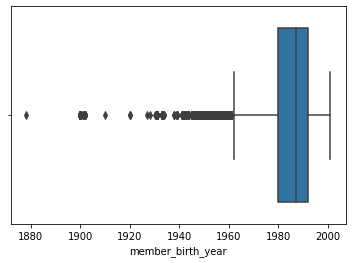

In [ ]:
#Checking for outliers in member birth year column 
sns.boxplot(df_bike['member_birth_year']);

The above visual shows that there are outliers in the member_birth_year column and people born before 1920 will need to be dropped.

In [ ]:
#Remove outliers in Birth year column 
df_data = df_bike[df_bike['member_birth_year']<1920].index
df_bike = df_bike.drop(index=df_data)
df_bike.describe()

,duration_sec,member_birth_year,duration_minute,start_day,start_hour,end_day,end_hour,age
count,174880.000000,174880.000000,174880.000000,174880.000000,174880.000000,174880.000000,174880.000000,174880.000000
mean,704.022358,1984.837957,11.733706,15.312271,13.456181,15.311648,13.609555,34.162043
std,1642.514884,9.974001,27.375248,8.034011,4.734400,8.034213,4.748147,9.974001
min,61.000000,1920.000000,1.016667,1.000000,0.000000,1.000000,0.000000,18.000000
25%,323.000000,1980.000000,5.383333,8.000000,9.000000,8.000000,9.000000,27.000000
50%,510.000000,1987.000000,8.500000,15.000000,14.000000,15.000000,14.000000,32.000000
75%,789.000000,1992.000000,13.150000,22.000000,17.000000,22.000000,18.000000,39.000000
max,84548.000000,2001.000000,1409.133333,28.000000,23.000000,28.000000,23.000000,99.000000


The member_birth_year will not be needed for further analysis and it would be dropped.

In [ ]:
#dropping the member birth year column
df_bike.drop("member_birth_year", axis=1, inplace=True)
#confirming if the changes has been made
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174880 non-null  int64         
 1   start_time               174880 non-null  datetime64[ns]
 2   end_time                 174880 non-null  datetime64[ns]
 3   start_station_name       174880 non-null  object        
 4   end_station_name         174880 non-null  object        
 5   user_type                174880 non-null  object        
 6   member_gender            174880 non-null  object        
 7   bike_share_for_all_trip  174880 non-null  object        
 8   duration_minute          174880 non-null  float64       
 9   start_day                174880 non-null  int64         
 10  start_day_of_week        174880 non-null  object        
 11  start_hour               174880 non-null  int64         
 12  end_day         

In [60]:
#creating a function which diffrent univariate plots
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))

    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Blues_r')
    else:
        g = sns.countplot(df[feature], palette='Blues')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### Distribution of Member Gender

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


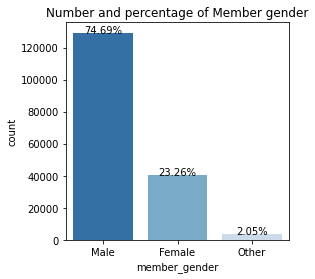

In [61]:
#ploting the number and percentage of member gender
plot_count("member_gender", "Member gender", df_bike,1);


from the above visual the bulk of members are males which represent 74.69 % From the total trips while female members account for 23.26% of all users and other gender represent 2.05%.

### Distribution of User Types

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


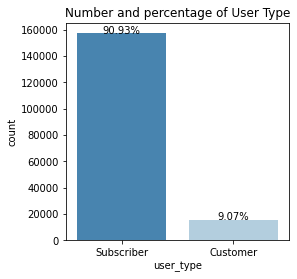

In [62]:
#ploting the number and percentage of user type
plot_count("user_type", "User Type", df_bike,1);

Subscribers trips represent 90.93 % From the total trips while customer trips represent 9.07%. this shows that majority of members(user_type) are subscribers


### Distribution of Bike Sharing For All Trips

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


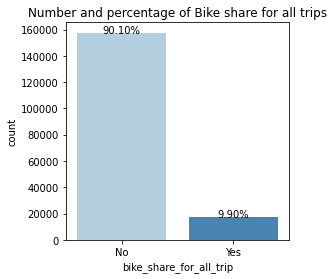

In [ ]:
##ploting the number and percentage bike share for all trips
plot_count("bike_share_for_all_trip", "Bike share for all trips", df_bike,1);


Users who doesn't share bike represent 90.10 % From the total trips while 9.90% represent users who share bike.

### Distribution of Duration In Sec

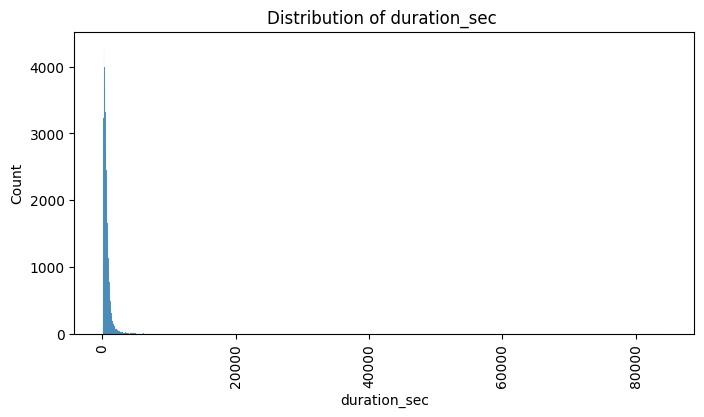

In [ ]:
#showing the Distribution of duration_sec
plt.figure(figsize = (8,4), dpi = 100)
color = sns.color_palette()[0]
sns.histplot(data=df_bike, x='duration_sec', color=color)
plt.xticks(rotation=90)
plt.xlabel('duration_sec')
plt.ylabel('Count')

plt.title("Distribution of duration_sec ")

plt.show()

The above visual shows that the curve has a very long right tail. As a result, I want to examine the duration in minute to give more details.

### Distribution of Duration In Minute

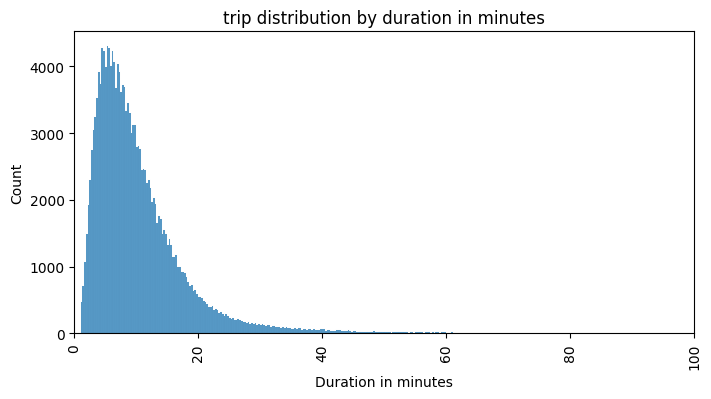

In [ ]:
# trip distribution by duration
plt.figure(figsize = (8, 4), dpi = 100)

sns.histplot(data = df_bike, x = "duration_minute")
plt.xlim(0, 100)
plt.xticks(rotation=90)
plt.title("trip distribution by duration in minutes")
plt.xlabel('Duration in minutes')
plt.ylabel('Count')
#plt.axvline(x=30, color = "red")
plt.show()

In [ ]:
len(df_bike[df_bike["duration_minute"] > 50]) / len(df_bike["duration_minute"]) * 100

1.1001829826166514

In [ ]:
df_bike = df_bike[df_bike["duration_minute"] <= 50]

from the above visual the distribution of duration in minute,I notice that only 1.1 percent of trips are of duration more than 1 hour.This might be considered as outliers and it was removed.

### Distribution Of Age

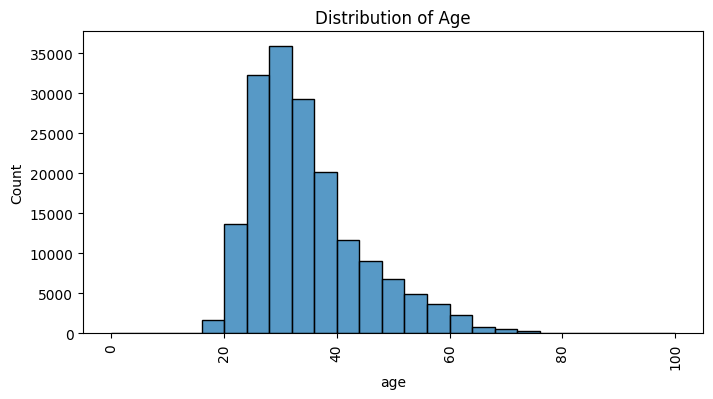

In [ ]:
#showing the Distribution of Age
plt.figure(figsize = (8,4), dpi = 100)
base_color = sns.color_palette()[0]

bins = np.arange(0, df_bike['age'].max()+4, 4)
sns.histplot(data=df_bike, x='age', color=base_color, bins = bins)
plt.xticks(rotation=90)
plt.xlabel('age')
plt.ylabel('Count')

plt.title("Distribution of Age")

plt.show()

The histogram above shows that most members are between the ages of 20 and 50.

### Distribution of Start day and End Day

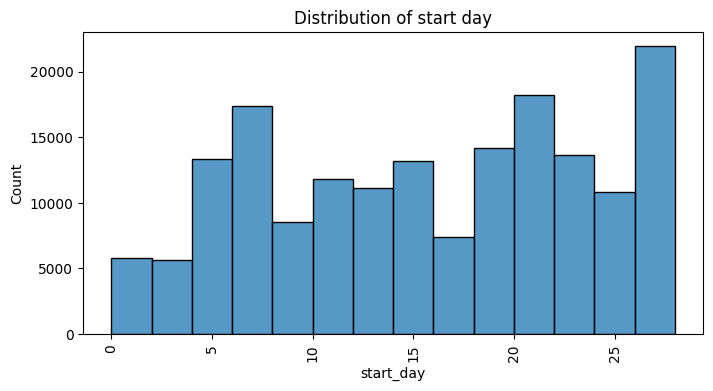

In [ ]:
#showing the Distribution of start day
plt.figure(figsize = (8,4), dpi = 100)
base_color = sns.color_palette()[0]

bins = np.arange(0, df_bike['start_day'].max()+2, 2)
sns.histplot(data=df_bike, x='start_day', color=base_color, bins = bins)
plt.xticks(rotation=90)
plt.xlabel('start_day')
plt.ylabel('Count')

plt.title("Distribution of start day")

plt.show()

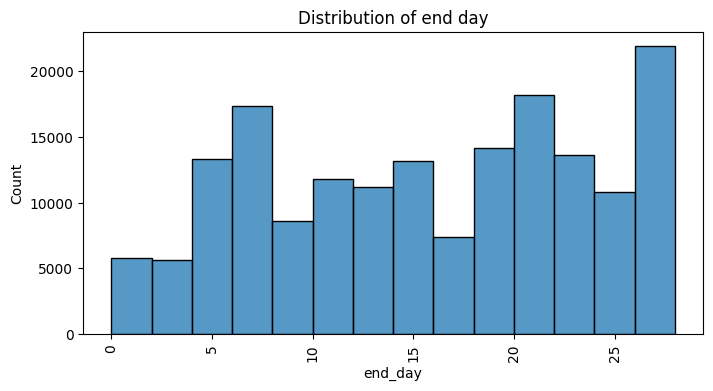

In [ ]:
#showing the Distribution of end day
plt.figure(figsize = (8,4), dpi = 100)
base_color = sns.color_palette()[0]

bins = np.arange(0, df_bike['end_day'].max()+2, 2)
sns.histplot(data=df_bike, x='end_day', color=base_color, bins = bins)
plt.xticks(rotation=90)
plt.xlabel('end_day')
plt.ylabel('Count')

plt.title("Distribution of end day")

plt.show()

The distribution dor start and end day are the same 

### Distribution of Start and End Hour

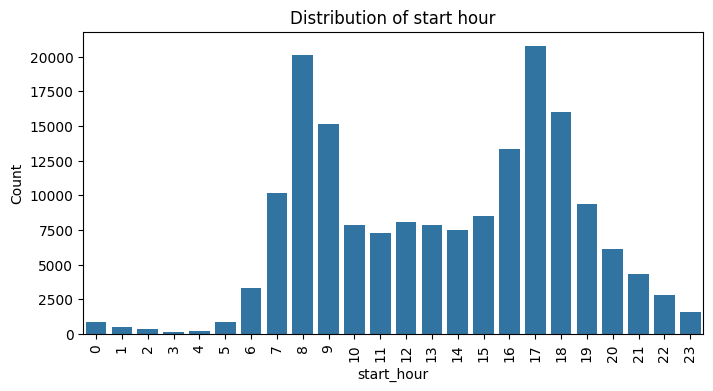

In [ ]:
#showing the Distribution of start hour
plt.figure(figsize = (8,4), dpi = 100)
color = sns.color_palette()[0]

sns.countplot(data=df_bike, x='start_hour', color=color)
plt.xticks(rotation=90)
plt.xlabel('start_hour')
plt.ylabel('Count')

plt.title("Distribution of start hour")

plt.show()

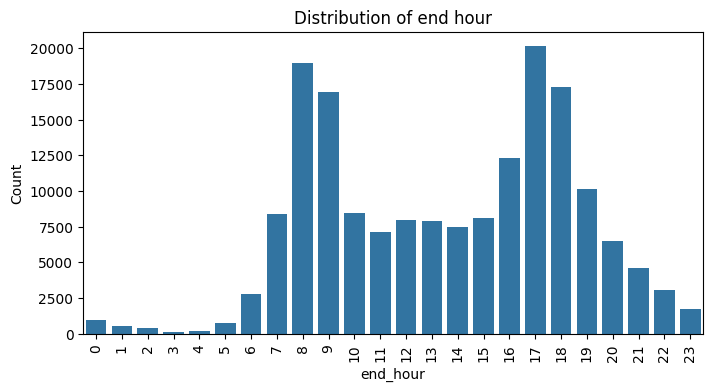

In [ ]:
#showing the Distribution of end hour
plt.figure(figsize = (8,4), dpi = 100)
color = sns.color_palette()[0]

sns.countplot(data=df_bike, x='end_hour', color=color)
plt.xticks(rotation=90)
plt.xlabel('end_hour')
plt.ylabel('Count')

plt.title("Distribution of end hour")

plt.show()

From the graph of distribution of start and end hour are the same but there was a slight difference in peak hours of (end_hour) which are from 7 - 9 am compare to the start hour from 7 - 9 am and there was a peak hour from 4 - 6 pm(for both start and end hour). This might be related to the time when employees and students go to and leave work and school.

### Distribution of Start and End of Week Days

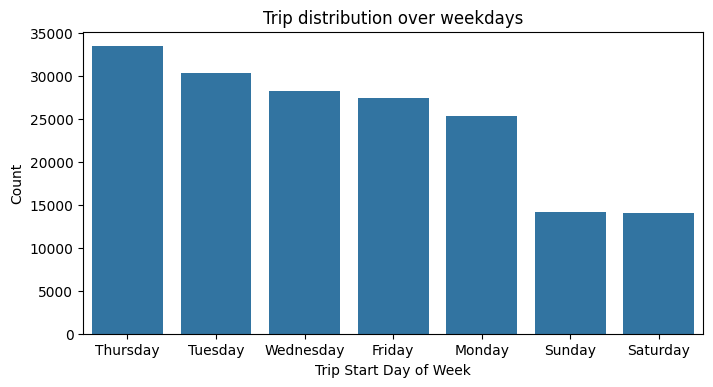

In [ ]:
# trip distribution over weekdays
plt.figure(figsize = (8,4), dpi = 100)
color = sns.color_palette()[0]
order = df_bike['start_day_of_week'].value_counts().index
sns.countplot(data=df_bike, x='start_day_of_week', color=color, order=order)
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count')
plt.title("Trip distribution over weekdays")

plt.show()

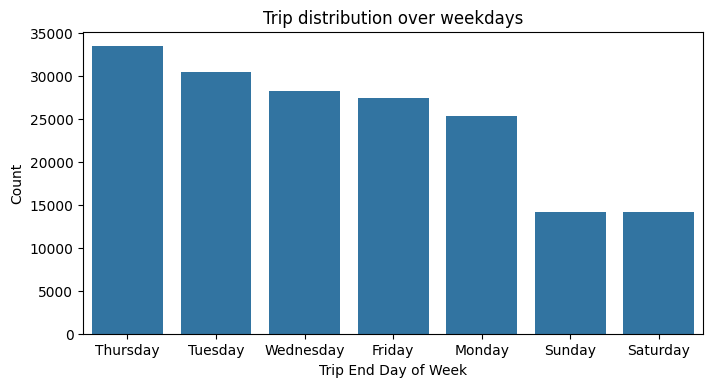

In [ ]:

# trip distribution over weekdays
plt.figure(figsize = (8,4), dpi = 100)
color = sns.color_palette()[0]

sns.countplot(data=df_bike, x='end_day_of_week', color=color, order=order)
plt.xlabel('Trip End Day of Week')
plt.ylabel('Count')
plt.title("Trip distribution over weekdays")

plt.show()

The distribution of both Start and End of Day of week shows that the demand for trips gradually increases from its highest levels on Thursday it then declines untill reaching its lowest levels on Saturday and Sunday. This is due to the fact that Saturday and Sunday are the weekend in the United States of America.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the distribution of duraction sec,I notice that the curve has a very long right tail. As a result, I examine the duration in minute to give more details.I noticed that only 1.10 percent of trips are of duration more than 1 hour. These were considered as outliers and were removed before going further in the bivariate analysis.

>I also noticed that peak hours are those from 7 - 9 am and from 4 - 6 pm AND there was a slight difference in the peak hour of (end_hour) from 7-9am. This might be related to the time when employees and students go to and leave work and school. This is was also consistent with the distribution of trips over weekdays, where work days have the most demand for trips.



>From the age distribution it shows that the majority of users are 20-50 years old,

>Customers represent 9.47 percent of users, whereas subscribers represents 90.53 percent of users.

>Males represent 74.59 percent of users, whereas Females represents 23.33percent and other gender represent with 2.08 percent

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of duration in sec did not give enough,further investigation was done and I noticed 1.10 percent of trips are of duration more than 1 hour 

There were some outliers that I removed.

I created a new features out of the time and age variables.

In [57]:
# Saving the new DataFrame to a new CSV file
df_bike.to_csv("bike_dataset.csv", index=False)

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in our data.

### Relationship Between Bike Share For All Trip By User Type

In [ ]:
#a function that shows the relationship between bike share for all trip by user type
def cp(data, x):
    ax=sns.countplot(x='user_type', hue='bike_share_for_all_trip', data=data)
    ax.set_title(f"bike_share_for_all_trip by {x}")
    plt.show()
    df_bike.groupby('user_type')["bike_share_for_all_trip"].value_counts().unstack()

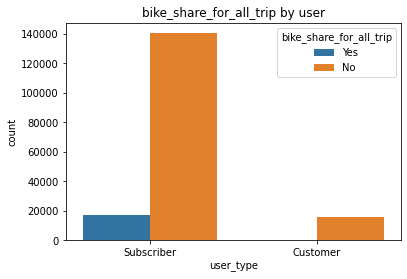

In [ ]:
cp(df_bike, 'user')


The results above demonstrate that only subscribers shared bikes, and no customers ever shared a bike for the entirety of a trip. Also subscribers have the highest number of no sharing of bike 

### Relationship Between Member Gender By User Type

In [ ]:
#a function that shows the relationship between member gender by user type
def cp(data, x):
    ax=sns.countplot(x='member_gender', hue='user_type', data=data)
    ax.set_title(f"User type by {x}")
    plt.show()
    df_bike.groupby('member_gender')["user_type"].value_counts().unstack()

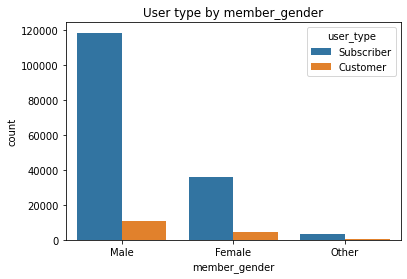

In [ ]:
cp(df_bike, 'member_gender')

The results above demonstrate that male has the highest subscribers of bikes, and other gender has little or no subcriber and customers ever shared a bike for the entirety of a trip.

### Association Between Bike Share For All Trip and Age

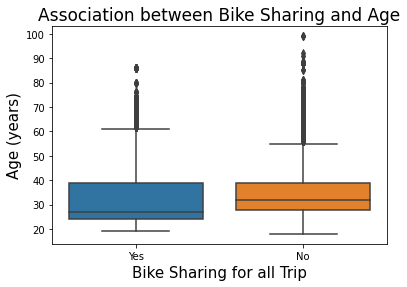

In [ ]:
# ploting the association between bike sharing and age
sns.boxplot(data = df_bike, x = 'bike_share_for_all_trip', y = 'age')

# Format the plot's visual
plt.xlabel('Bike Sharing for all Trip', size = 15)
plt.ylabel('Age (years)', size = 15);
plt.title('Association between Bike Sharing and Age', size = 17);

The results above shows that youth members are more willing to share their bike.

### What Is The Average Mean Of Age By Member Gender

In [ ]:
# groupby average mean of age by member gender
average_mean = df_bike.groupby('member_gender').mean()['age']
average_mean

member_gender
Female    33.197584
Male      34.408972
Other     35.757910
Name: age, dtype: float64

Text(0, 0.5, 'age')

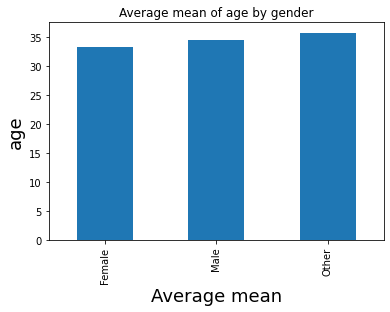

In [ ]:
#viewing bar plot of average mean age by member gender 
average_mean.plot(kind='bar')
plt.title("Average mean of age by gender")
plt.xlabel('Average mean', fontsize=18)
plt.ylabel("age", fontsize=18)

The above output shows that there is little or no signifiicant difference in age between gender type. 

### What Is The Average Mean of Days Of Week By Duration in Seconds

Text(0, 0.5, 'Trip Duration (Sec)')

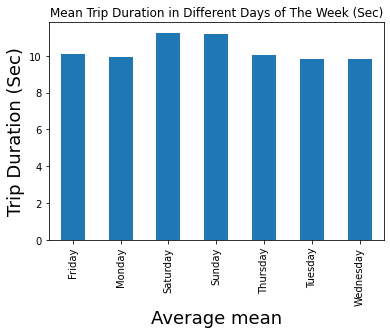

In [ ]:
# groupby average mean of days of the week by duration(sec)
average_mean = df_bike.groupby(['start_day_of_week'])['duration_minute'].mean()
#viewing bar plot of average mean days of the week by duration(sec)
average_mean.plot(kind='bar')
plt.title("Mean Trip Duration in Different Days of The Week (Sec)")
plt.xlabel('Average mean', fontsize=18)
plt.ylabel("Trip Duration (Sec)", fontsize=18)

The above visual shows that the duration(sec) are mostly high on weekends(saturday and sunday) while the duration of trip during weekdays are almost the same.

### Relationship Between Start Day Of Week By Member Gender

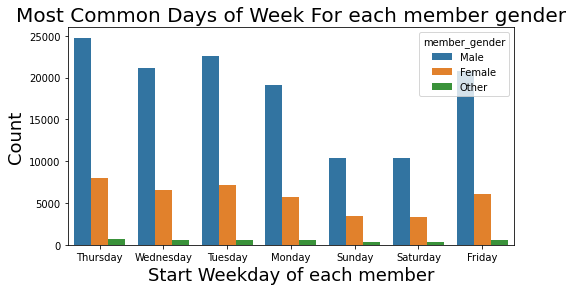

In [ ]:
#plotting the relationship between Start day of week by member gender.
plt.figure(figsize = (8,4))
sns.countplot(data=df_bike, x=df_bike['start_day_of_week'], hue='member_gender')
plt.title('Most Common Days of Week For each member gender', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Start Weekday of each member', fontsize=18); 

the above visual shows that Male members demand for trips the most and its highest levels on Thursday it then declines untill reaching its lowest levels on Saturday and Sunday.

What Is The Most Common Days Of Week For Sharing Bike

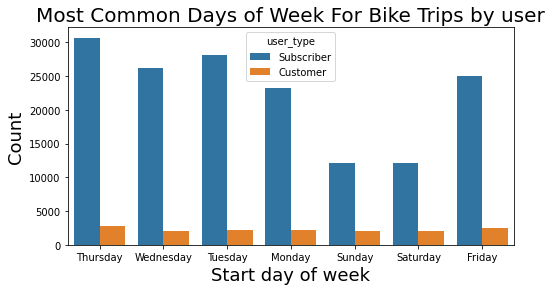

In [ ]:
#plot showing the most common days of week for bike trip by user.
plt.figure(figsize = (8,4))
sns.countplot(data=df_bike, x=df_bike['start_day_of_week'], hue='user_type')
plt.title('Most Common Days of Week For Bike Trips by user', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Start day of week', fontsize=18); 

The above Visual shows that thursday, Tuesday and wednesday are the most common day of the week where majority are subcribers while there is no or little significant difference in days of the week by customers.

### What Is The Relationship Between Member Gender And Duration in Minute

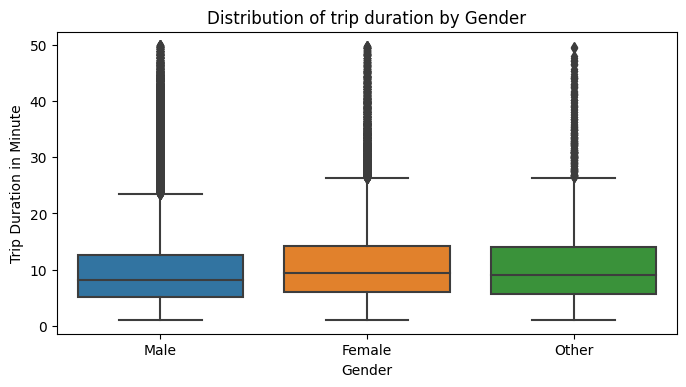

In [ ]:
#plot showing the relationship between member gender and duration in minute
plt.figure(figsize = (8,4), dpi = 100)

sns.boxplot(data = df_bike, x = "member_gender", y = "duration_minute")
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute')

plt.title("Distribution of trip duration by Gender")

plt.show()

Male riders seem to have shorter trips compared to female and other gender types, this is an evident by smaller median. However, the difference is very small and we are not sure whether it is significant or not.

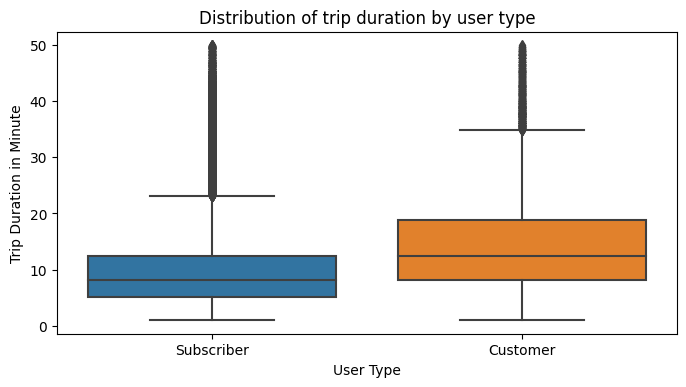

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

sns.boxplot(data = df_bike, x = "user_type", y = "duration_minute")
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute')

plt.title("Distribution of trip duration by user type")

plt.show()

The above visual indicate that Subscribers has shorter trips, whereas casual riders (customers) have longer trips.

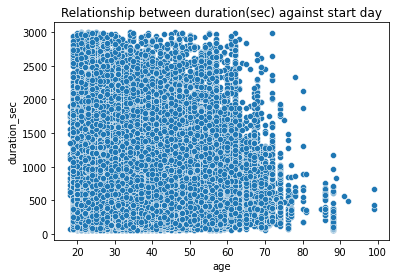

In [ ]:
#plot showing the relationship between member gender and duration in minute
sns.scatterplot(y= 'duration_sec', x = 'age', data = df_bike)
plt.title('Relationship between duration(sec) against start day')
plt.show()

There is strong 

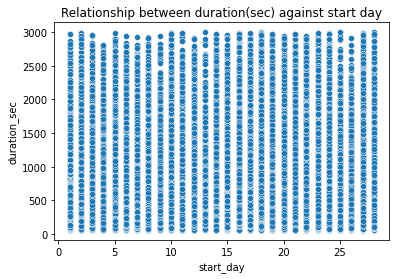

In [ ]:
#plotting showing duration(sec) against start day
sns.scatterplot(y= 'duration_sec', x = 'start_day', data = df_bike)
plt.title('Relationship between duration(sec) against start day')
plt.show()

There is no significant relationship between duration and start of day

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The majority of bike-sharing riders are in their twenties hence Youthful members are more willing to share the bike.

>There is a strong negative association between duration and age. The trip lasts longer time and become less as the member becomes older.

>Only subscribers shared bikes, and no customers ever shared a bike for the entirety of the trip.

>the duration(sec) are mostly high on weekends(saturday and sunday) while the duration of trip during weekdays are almost the same.

>Subscribers has shorter trips, whearas casual riders (customers) have longer trips.

>There is no significant relationship between duration and start of day

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


>Bike sharing is limited to subscribers.

>only subscribers shared bikes, and no customers ever shared a bike for the entirety 

>There is little or no signifiicant difference in age and gender type. 

>Thursday, Tuesday and wednesday are the most common day of the week where majority are subcribers while there is no or little significant difference in days of the week by customers.

>Male riders seem to have shorter trips compared to female and other gender types, this is an evident by smaller median. However, the difference is very small and I am not sure whether it is significant or not.

## Multivariate Exploration

> In this section, I will be creating plots of three or more variables to investigate your data even further.

WHAT IS THE RELATIONSHIP START DAY OF WEEK AGAINST DURATION MINUTE WITH RESPECT TO USER TYPE.

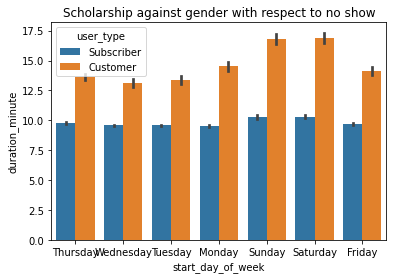

In [ ]:
#plotting having Start day of week against duration minute with respect user type
sns.barplot(x = 'start_day_of_week', y = 'duration_minute', hue = 'user_type', data = df_bike)
plt.title('Scholarship against gender with respect to no show')
plt.show()

There are way more Customers than Subcribers. Subscribers usage seem to be very consistent and their usage is intended for daily routine and there is little or no significant changes between the weekdays and weekends.Customers on the other hand tend to use bikes for fun, their usage is concentrated during weekends.

WHAT IS THE RELATIONSHIP BETWEEN AGE AGAINST DURATION IN SECONDS WITH RESPECT TO USER TYPE.

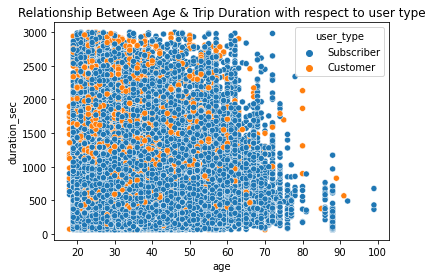

In [ ]:
#plotting relationship between age & trip duration with respect to user type
sns.scatterplot(x = 'age', y = 'duration_sec', hue = 'user_type', data = df_bike)
plt.title('Relationship Between Age & Trip Duration with respect to user type')
plt.show()

WHAT IS THE RELATIONSHIP BETWEEN AGE AGAINST DURATION IN SECONDS WITH RESPECT TO MEMBER GENDER.

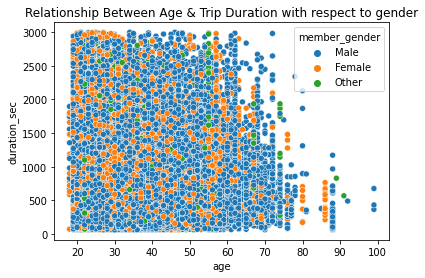

In [ ]:
#plotting relationship between age & trip duration with respect to gender
sns.scatterplot(x = 'age', y = 'duration_sec', hue = 'member_gender', data = df_bike)
plt.title('Relationship Between Age & Trip Duration with respect to gender')
plt.show()

WHAT IS THE RELATIONSHIP BETWEEN MEMBER GENDER AGAINST AGE WITH RESPECT TO USER TYPE

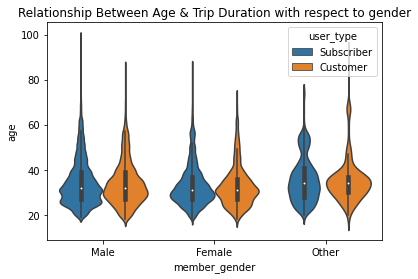

In [ ]:
#plotting relationship between member gender & age with respect to user type.
sns.violinplot(x = 'member_gender', y = 'age', hue = 'user_type', data = df_bike)
plt.title('Relationship Between member gender & age with respect to user type')
plt.show()

The above output shows that little or no significant relationship between User type and Age nor the Gender of the user.

WHAT IS THE RELATIONSHIP BETWEEN MEMBER GENDER AGAINST AGE WITH RESPECT TO BIKE SHARING

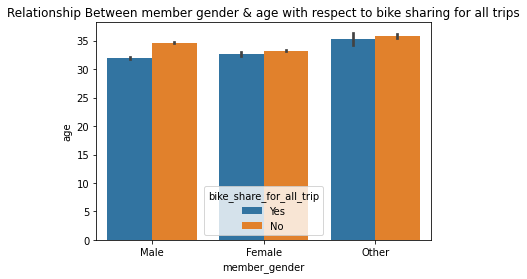

In [ ]:
#plotting relationship between member gender & age with respect to bike sharing for all trips
sns.barplot(x = 'member_gender', y = 'age', hue = 'bike_share_for_all_trip', data = df_bike)
plt.title('Relationship Between member gender & age with respect to bike sharing for all trips')
plt.show()

The above output shows that little or no significant relationship between bike sharingfor all trip  and Age nor the Gender of the user.

WHAT IS THE RELATIONSHIP BETWEEN MEMBER GENDER AGAINST DURATION IN MINUTE WITH RESPECT TO BIKE SHARING FOR ALL TRIP.

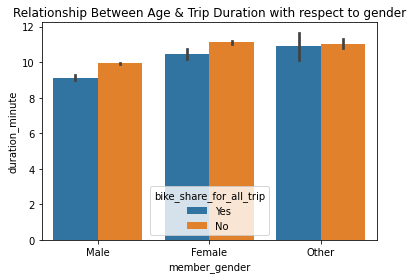

In [ ]:
#plotting relationship between member gender & trip duration in minute with respect to bike sharing for all trip.
sns.barplot(x = 'member_gender', y = 'duration_minute', hue = 'bike_share_for_all_trip', data = df_bike)
plt.title('Relationship Between member gender & trip duration in minute with respect to bike sharing')
plt.show()

The above output shows that little or no significant relationship between member gender and bike sharing for all trip nor the duration in minute of the trip.

WHAT IS THE RELATIONSHIP BETWEEN MEMBER GENDER AGAINST DURATION IN MINUTE WITH RESPECT TO USER TYPE

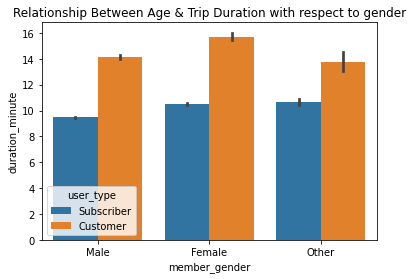

In [ ]:
#plotting relationship between member gender & trip duration with respect to user type
sns.barplot(x = 'member_gender', y = 'duration_minute', hue = 'user_type', data = df_bike)
plt.title('Relationship Between member gender & Trip Duration with respect to user type')
plt.show()

The above shows that female has the highest number of customer for the duration of trip while there is light or no significant changes in subscribers. 

HEATMAP SHOWING THE RELATIONSHIP BETWEEN VARIOUS FEATURES.

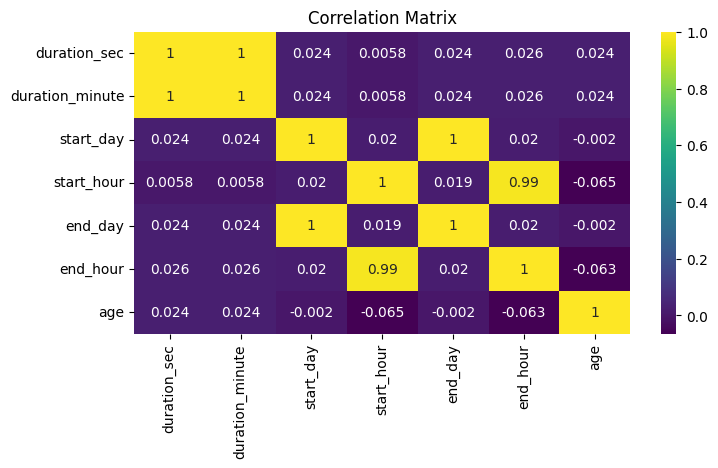

In [ ]:
#plot showing the relationship between various features
plt.figure(figsize = (8,4), dpi = 100)

sns.heatmap(df_bike.corr(), cmap = "viridis", annot = True)
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Bike sharing is connected with younger age across all genders, i.e. most of the members who share the bike for the entire journey are younger.

>female has the hishest number of customer for the duration of trip while there was little or no signficant changes in number of subscribers across all gender.

### Were there any interesting or surprising interactions between features?

> There were little or no relationship between three features

## Conclusions 
The following are the important findings of the above analysis in the Data Wrangling & cleaning process.
1. The missing values found were removed as they didn't show any statistical significance in the dataset.

2. The datetime columns types were converted to an appropriate data type.

3. New features were created from datetime columns (showing day, day of week, hour) to give more insights.

4. New feature was created from the member_birth year to form the age column and member birth year column was removed.

5. Outliers were detected in the age columns and removed due to non-statistical significance.

6. Some unnecessary features were removed to focus more on the significant features


Findings in Data from exploratory visualizations

1. Most Users are subscribers as 90.53% of total trips are for subscribers showing that people will be more likely to engage in the service on consistent basis and subscribe.

2. Customers have consistently longer trips across all hours of the day. However,subcribers has shorter trips 

2. Males represent around 74.6 % of the total trips giving more indication about females not prefering bikes as go to for workouts.

3. There is a clear different usage pattern between customers and subscribers
between features:It was surbrizing to see customers rides mostly occur during midnight and midday

4. Trips duration is highest at age range from 20 to 40 as they are the most users.

5. Youthful members are more willing to share the bike.

6. Most trips fall in Thursday,Tuesday,Friday and this indicate that people use bike trips mostly for work and school. 

7. Customers on the other hand tend to use bikes for fun, their usage is concentrated during weekend and majorly for entertainmen.

8. Rush hour in bike trips would be between around 7 - 9am and 4 -6pm which is very logical and this might be related to the time when employees and students go to and leave work and school.

9. The distribution of both Start and End of Day of week shows that the demand for trips gradually increases from its highest levels on Thursday it then declines untill reaching its lowest levels on Saturday and Sunday. This is due to the fact that Saturday and Sunday are the weekend in the United States of America.